In this exercise, we are going to train a TensorFlow model and
reload it for prediction in TensorFlow 2.0. The data set that we are going to use to train this deep neural network is
the standard **MNIST** dataset.
**MNIST** dataset contains `70,000` images (in grayscale) in `10` different categories. The images are `28 × 28` pixels of handwritten digits, with values ranging from `0` to `255`. Of the total `70,000` images, `60,000` are used for training, and the remaining `10,000` images are used for testing. The labels are integer arrays ranging from `0` to `9`. Each grayscale image is normalized to fit a `28 × 28` pixel bounding box. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import required packages and modules

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-beta1


# Load and explore the MNIST dataset

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print('Training Images Dataset Shape: {}'.format(X_train.shape))
print('\nNo. of Training Images Dataset Labels: {}'.format(len(y_train)))
print('\nTest Images Dataset Shape: {}'.format(X_test.shape))
print('\nNo. of Test Images Dataset Labels: {}'.format(len(y_test)))

Training Images Dataset Shape: (60000, 28, 28)

No. of Training Images Dataset Labels: 60000

Test Images Dataset Shape: (10000, 28, 28)

No. of Test Images Dataset Labels: 10000


# View sample images and print the labels

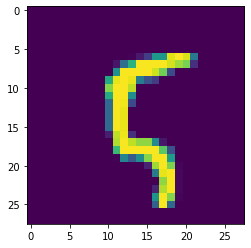

In [5]:
plt.imshow(X_train[100])

In [6]:
print(y_train[100])

5


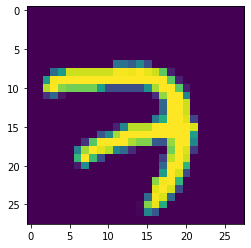

In [7]:
plt.imshow(X_train[5000])

In [8]:
print(y_train[5000])

7


# Scaling pixel values

As the pixel values range from `0 to 255`, we have to rescale these values in the range `0 to 1` before pushing them to the model. We can scale these feature values (both for training and test data sets) by dividing the values by `255`.

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the input images

Input image into a convnets is often of the shape (**BATCH, HEIGHT, WIDTH, CHANNEL**). For this dataset it would be `(60000, 28, 28, 1)` for the training image and `(10000, 28, 28, 1)` for the test image data. We can therefore reshape the training and test dataset by reshaping the matrices into a `28 × 28 × 1` array with the last dimension denoting the `gray` channel.

In [10]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [11]:
print('Training Images Dataset Shape: {}'.format(X_train.shape))
print('\nNo. of Training Images Dataset Labels: {}'.format(len(y_train)))
print('\nTest Images Dataset Shape: {}'.format(X_test.shape))
print('\nNo. of Test Images Dataset Labels: {}'.format(len(y_test)))

Training Images Dataset Shape: (60000, 28, 28, 1)

No. of Training Images Dataset Labels: 60000

Test Images Dataset Shape: (10000, 28, 28, 1)

No. of Test Images Dataset Labels: 10000


# Transform the target class

We need to convert the target class variable
(`y_train` and `y_test`) into one-hot encoded vectors that the neural network can understand and work on.

In [12]:
num_classes = np.unique(y_train)
print('Target classes:', num_classes)

Target classes: [0 1 2 3 4 5 6 7 8 9]


In [13]:
print('Before encoding: ', y_train[0], end=' after: ')
y_train = keras.utils.to_categorical(y_train, len(num_classes))
y_test = keras.utils.to_categorical(y_test, len(num_classes))
print(y_train[0])

Before encoding:  5 after: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Image and imput dimensions

In [14]:
img_height = X_train.shape[1]
img_width = X_train.shape[2]
input_shape = (img_height, img_width, 1)

# Build the convnet model

First layer is a **convolutional** layer with `ReLU` activation function: This layer takes the 2D array (`28 × 28` pixels) as input. We will apply `6` convolutional kernels (filters) of shape `5 × 5` pixels. The output will be passed to a `ReLU` activation function before being passed to the next layer.
We are cascading *non-linear* activation function `ReLU` because stacking non-linear function **leads to an increased in model complexity** and consequently an **increase in its capacity to extract features** from training samples.

In [15]:
lenet5 = keras.models.Sequential()
lenet5.add(keras.layers.Conv2D(6, kernel_size = (5, 5), activation = 'relu', input_shape = input_shape, padding ='same', name = 'Conv2D_layer_1'))
lenet5.add(keras.layers.AveragePooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid'))

Second layer above is a **pooling** layer: This layer takes the `6` `27 × 27` `2D` arrays output from first layer as input and transforms them into `16` arrays, with dimensions `23 x 23` (i.e., from `27 × 27` to `23 × 23` pixels) using a **AveragePooling2D** filter of size `(2, 2)`.

In [16]:
lenet5.add(keras.layers.Conv2D(16, kernel_size = (5, 5), activation = 'relu', padding ='valid', name = 'Conv2D_layer_2'))
lenet5.add(keras.layers.AveragePooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid'))
lenet5.add(keras.layers.Conv2D(120, kernel_size = (5, 5), activation = 'relu', name = 'Conv2D_layer_3'))

The subsiquent layers and output layer — **covd2D, AveragePooling2D and fully connected** or **dense** layer: These layers take the `16` `23 × 23` `2D` arrays from layers above as input and transforms it first into `16` `22 × 22` `2D` arrays and `120` `18 × 18` `2D` arrays before flattening it using (**flatten**) layer into a `1D` array of `38880` elements i.e `(120 × 18 × 18)`. These `38880` input elements are passed through a **fully connected** or **dense** or **MLP** layer with `84` units (neurons) and finally through an output layer (MLP) with `10` units and a **softmax** activation function that gives the **probability scores** for each of the `10` output labels.

In [17]:
lenet5.add(keras.layers.Flatten(name = 'Flatten'))
lenet5.add(keras.layers.Dense(84, activation = 'relu', name = 'Dense_layer_1'))
lenet5.add(keras.layers.Dense(10, activation = 'softmax', name = 'Output_layer'))

In [19]:
lenet5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_layer_1 (Conv2D)      (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
Conv2D_layer_2 (Conv2D)      (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 22, 22, 16)        0         
_________________________________________________________________
Conv2D_layer_3 (Conv2D)      (None, 18, 18, 120)       48120     
_________________________________________________________________
Flatten (Flatten)            (None, 38880)             0         
_________________________________________________________________
Dense_layer_1 (Dense)        (None, 84)                3

# Compile the model

In [20]:
lenet5.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the model

In [21]:
batch_size = 64
epochs = 50
history = lenet5.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.15)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 51000 samples, validate on 9000 samples
Epoch 1/50
51000/51000 [==============================] - 134s 3ms/sample - loss: 0.4248 - accuracy: 0.8750 - val_loss: 0.1742 - val_accuracy: 0.9450
Epoch 2/50
51000/51000 [==============================] - 135s 3ms/sample - loss: 0.1333 - accuracy: 0.9598 - val_loss: 0.0960 - val_accuracy: 0.9708
Epoch 3/50
51000/51000 [==============================] - 135s 3ms/sample - loss: 0.0899 - accuracy: 0.9730 - val_loss: 0.0887 - val_accuracy: 0.9736
Epoch 4/50
51000/51000 [==============================] - 136s 3ms/sample - loss: 0.0689 - accuracy: 0.9787 - val_loss: 0.0703 - val_accuracy: 0.9788
Epoch 5/50
51000/51000 [==============================] - 135s 3ms/sample - loss: 0.0558 - accuracy: 0.9825 - val_loss: 0.0817 - val_accuracy: 0.9771
Epoch 6/50
51000/51000 [==============================] - 136s 3ms/sample - loss: 0.0471 - accuracy: 0.9855

# Model Evaluation - list all data in history

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [23]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
print('Training Accuracy: {}%'.format(round(sum(train_acc) / len(train_acc) * 100, 2)))

Training Accuracy: 99.35%


In [25]:
print('Validation Accuracy: {}%'.format(round(sum(val_acc) / len(val_acc) * 100, 2)))

Validation Accuracy: 98.52%


In [26]:
test_loss, test_accuracy = lenet5.evaluate(X_test, y_test)

10000/10000 [==============================] - 7s 708us/sample - loss: 0.0630 - accuracy: 0.9881


In [27]:
print('Test Accuracy: {}%'.format(round(float(test_accuracy) * 100, 2)))

Test Accuracy: 98.81%


# Plot scores

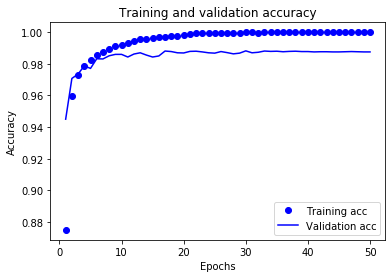

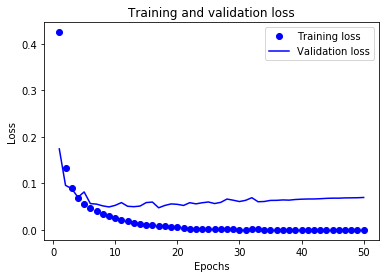

In [28]:
x_epochs = range(1, epochs + 1)

plt.plot(x_epochs, train_acc, 'bo', label='Training acc')
plt.plot(x_epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(x_epochs, train_loss, 'bo', label='Training loss')
plt.plot(x_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

These plots are characteristic of overfitting. Our training accuracy increases linearly over time, until it reaches nearly `100%`, while our validation accuracy stalls at `98%`. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss keeps decreasing linearly until it reaches nearly 0.

Because we already have relatively sufficient training samples (51000), we are going to combat this overfitting using techniques such as **dropout** and weight decay (**L2 regularization**).

The creator of dropout *Geof Hinton* claimed that overfitting occurs due to some kind of *"conspiracies"* between lower and upper layers of the network. These *conspiracies* can be prevented by introducing some noise in the output values of a layer. This would force an upper layer to work independently rather than simply memorizing what the lower layers have learned.

# Model with Dropout

In [29]:
dpt_lenet5 = keras.models.Sequential()
dpt_lenet5.add(keras.layers.Conv2D(6, kernel_size = (5, 5), activation = 'relu', input_shape = input_shape, padding ='same', name = 'Conv2D_layer_1'))
dpt_lenet5.add(keras.layers.Dropout(0.5))
dpt_lenet5.add(keras.layers.AveragePooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid'))
dpt_lenet5.add(keras.layers.Conv2D(16, kernel_size = (5, 5), activation = 'relu', padding ='valid', name = 'Conv2D_layer_2'))
dpt_lenet5.add(keras.layers.Dropout(0.5))
dpt_lenet5.add(keras.layers.AveragePooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid'))
dpt_lenet5.add(keras.layers.Conv2D(120, kernel_size = (5, 5), activation = 'relu', name = 'Conv2D_layer_3'))
dpt_lenet5.add(keras.layers.Dropout(0.5))
dpt_lenet5.add(keras.layers.Flatten(name = 'Flatten'))
dpt_lenet5.add(keras.layers.Dense(84, activation = 'relu', name = 'Dense_layer_1'))
dpt_lenet5.add(keras.layers.Dense(10, activation = 'softmax', name = 'Output_layer'))

dpt_lenet5.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
batch_size = 64
epochs = 50
dpt_history = dpt_lenet5.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/50
51000/51000 [==============================] - 172s 3ms/sample - loss: 0.5640 - accuracy: 0.8239 - val_loss: 0.1940 - val_accuracy: 0.9486
Epoch 2/50
51000/51000 [==============================] - 172s 3ms/sample - loss: 0.1885 - accuracy: 0.9431 - val_loss: 0.1103 - val_accuracy: 0.9702
Epoch 3/50
51000/51000 [==============================] - 173s 3ms/sample - loss: 0.1358 - accuracy: 0.9590 - val_loss: 0.0878 - val_accuracy: 0.9753
Epoch 4/50
51000/51000 [==============================] - 172s 3ms/sample - loss: 0.1086 - accuracy: 0.9671 - val_loss: 0.0682 - val_accuracy: 0.9813
Epoch 5/50
51000/51000 [==============================] - 172s 3ms/sample - loss: 0.0922 - accuracy: 0.9710 - val_loss: 0.0638 - val_accuracy: 0.9822
Epoch 6/50
51000/51000 [==============================] - 171s 3ms/sample - loss: 0.0827 - accuracy: 0.9742 - val_loss: 0.0593 - val_accuracy: 0.9829
Epoch 7/50
51000/51000 [===========================

# Evaluate the model

In [31]:
print(dpt_history.history.keys())
dpt_train_acc = dpt_history.history['accuracy']
dpt_val_acc = dpt_history.history['val_accuracy']
dpt_train_loss = dpt_history.history['loss']
dpt_val_loss = dpt_history.history['val_loss']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [32]:
print('Training Accuracy: {}%'.format(round(sum(dpt_train_acc) / len(dpt_train_acc) * 100, 2)))
print('Validation Accuracy: {}%'.format(round(sum(dpt_val_acc) / len(dpt_val_acc) * 100, 2)))

Training Accuracy: 98.44%
Validation Accuracy: 98.69%


In [33]:
dpt_test_loss, dpt_test_accuracy = lenet5.evaluate(X_test, y_test)

10000/10000 [==============================] - 7s 708us/sample - loss: 0.0630 - accuracy: 0.9881


In [34]:
print('Test Accuracy: {}%'.format(round(float(dpt_test_accuracy) * 100, 2)))

Test Accuracy: 98.81%


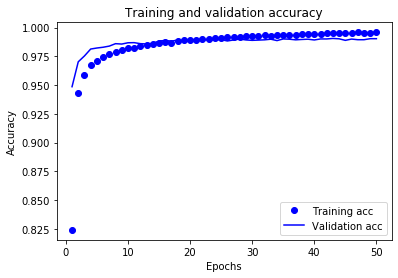

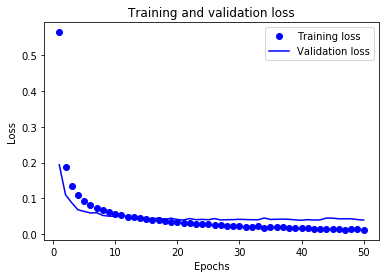

In [35]:
x_epochs = range(1, epochs + 1)

plt.plot(x_epochs, dpt_train_acc, 'bo', label='Training acc')
plt.plot(x_epochs, dpt_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(x_epochs, dpt_train_loss, 'bo', label='Training loss')
plt.plot(x_epochs, dpt_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Wow! It seems we actually succceeded in preventing the *consipiracies* between lower and upper layers of our network by applying dropouts! We have training and test accuracies above `98%` and both trainig accuracies and losses appear to converge. There is room to achieve a score above 99% if we apply additional techniques to mitigate overfitting such as *batch normalization*.

# Save the model as a Keras model

In [36]:
model_path = './model/dpt_lenet5.h5'
dpt_lenet5.save(model_path)

# Load model for prediction

In [37]:
loaded_lenet5 = keras.models.load_model(model_path)

In the following example, we load a test image (100), and then we will use our saved model to make a prediction about this image.

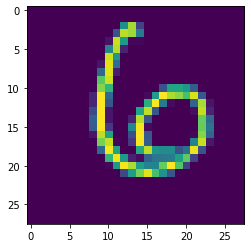

In [38]:
X_test_img = X_test[100].flatten().reshape(28, 28)
plt.imshow(X_test_img)

In [39]:
print(y_test[100])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Prepare image for prediction

In [40]:
new_image = X_test[100]

In [41]:
new_image = keras.preprocessing.image.img_to_array(new_image)

Get the image to the shape expected by con2D (BATCH, HEIGHT, WIDTH, CHANNEL)

In [42]:
new_image = np.expand_dims(new_image, axis = 0)

In [43]:
new_image.shape

(1, 28, 28, 1)

In [44]:
pred_class = loaded_lenet5.predict_classes(new_image)

In [45]:
print(pred_class)

[6]


In [46]:
print('Predicted class name:', pred_class[0])   

Predicted class name: 6


# Another prediction...

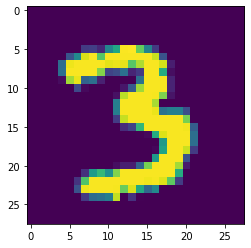

In [47]:
X_test_500 = X_test[500].flatten().reshape(28, 28)
plt.imshow(X_test_500)

In [48]:
print(y_test[500])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Prepare sample image for prediction

In [49]:
new_image = X_test[500]
new_image = keras.preprocessing.image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)
new_image.shape

(1, 28, 28, 1)

# Prediction

In [51]:
pred_class = loaded_lenet5.predict_classes(new_image)
print(pred_class)

[3]
